In [1]:
import pandas as pd
import seaborn as sns
import plotly as py
import matplotlib.pyplot  as plt
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = './ETL/data/'

files_list = ['hairkit_final.csv']
df = pd.DataFrame([])
for i in range(len(files_list)):
    filename = path + files_list[i]
    df = df.append(pd.read_csv(filename))
    
df.head()

,date,product_gtin,competition_price,price,freight_value,commission_product_olist,commission_freight_olist,orders,product_type,product_type_group,stock_max,stock_min,stock_avg,price_max,price_min,price_avg,offer_max,offer_min,offer_avg,weekday
0,2019-03-15,7908243600137,217.8,199.8,NaN,NaN,NaN,0.0,Kit para cabelo,beleza_saude,22.0,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,4
1,2019-03-16,7908243600137,217.8,199.8,NaN,NaN,NaN,0.0,Kit para cabelo,beleza_saude,22.0,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,5
2,2019-03-17,7908243600137,217.8,199.8,NaN,NaN,NaN,0.0,Kit para cabelo,beleza_saude,22.0,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,6
3,2019-03-18,7908243600137,217.8,199.8,NaN,NaN,NaN,0.0,Kit para cabelo,beleza_saude,22.0,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,0
4,2019-03-19,7908243600137,217.8,199.8,NaN,NaN,NaN,0.0,Kit para cabelo,beleza_saude,22.0,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,1


In [3]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

Drop columns commission_product_olist and commission_freight_olist because they not be used at this step

In [4]:
df = df.drop(['commission_product_olist', 'commission_freight_olist'], 1)

All NaN values are for moments that there are no orders. If we fill with 0, we can create some bias on the dataset, once we just have freight if we have orders. We opted to fill with median to allow the freight promotions to stimulate orders.

In [5]:
df = df.fillna(df.median())
df.head()

,date,product_gtin,competition_price,price,freight_value,orders,product_type,product_type_group,stock_max,stock_min,stock_avg,price_max,price_min,price_avg,offer_max,offer_min,offer_avg,weekday,month,day
0,2019-03-15,7908243600137,217.8,199.8,21.5675,0.0,Kit para cabelo,beleza_saude,22.0,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,4,3,15
1,2019-03-16,7908243600137,217.8,199.8,21.5675,0.0,Kit para cabelo,beleza_saude,22.0,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,5,3,16
2,2019-03-17,7908243600137,217.8,199.8,21.5675,0.0,Kit para cabelo,beleza_saude,22.0,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,6,3,17
3,2019-03-18,7908243600137,217.8,199.8,21.5675,0.0,Kit para cabelo,beleza_saude,22.0,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,0,3,18
4,2019-03-19,7908243600137,217.8,199.8,21.5675,0.0,Kit para cabelo,beleza_saude,22.0,22.0,22.0,217.8,217.8,217.8,199.8,199.8,199.8,1,3,19


In [6]:
df_values = df.loc[:, df.dtypes == float]
df_nonvalues = df.loc[:, df.dtypes != float]
df_values.describe()

,competition_price,price,freight_value,orders,stock_max,stock_min,stock_avg,price_max,price_min,price_avg,offer_max,offer_min,offer_avg
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,169.520625,176.518401,21.282880,3.091146,191.361979,172.013021,181.711551,182.795260,180.513984,182.118806,178.030859,176.801146,177.412847
std,22.275278,12.619539,7.354367,6.110345,153.537373,157.938126,152.936842,15.181213,16.009066,15.188436,9.843362,10.261568,9.984704
min,138.800000,140.670000,0.000000,0.000000,2.000000,0.000000,1.500000,160.680000,158.670000,160.680000,160.680000,158.670000,160.680000
25%,155.380000,171.357143,20.693750,0.000000,88.000000,20.000000,63.428571,175.000000,172.700000,174.278571,172.700000,172.700000,172.700000
50%,165.660000,174.950000,21.567500,1.000000,157.500000,141.500000,144.365079,179.900000,175.000000,176.847333,175.000000,174.500000,175.000000
75%,175.000000,177.200000,23.050625,3.000000,310.000000,276.000000,294.940000,179.900000,179.900000,179.900000,179.900000,175.000000,177.200000
max,229.800000,229.800000,76.160000,45.000000,600.000000,574.000000,586.115646,229.000000,217.800000,217.800000,199.800000,199.800000,199.800000


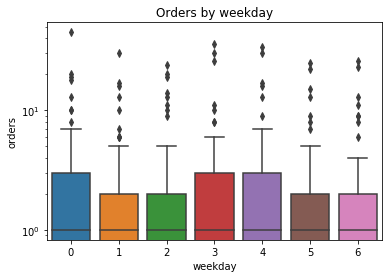

In [7]:
sns.boxplot(x='weekday', y='orders',  data=df).set_title('Orders by weekday')
plt.yscale('log')

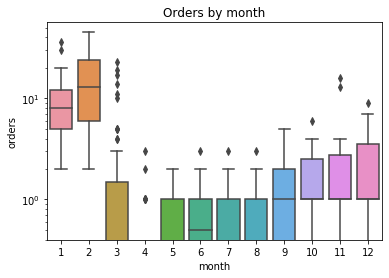

In [8]:
sns.boxplot(x='month', y='orders',  data=df).set_title('Orders by month')
plt.yscale('log')

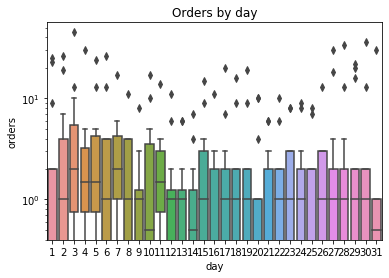

In [9]:
sns.boxplot(x='day', y='orders',  data=df).set_title('Orders by day')
plt.yscale('log')

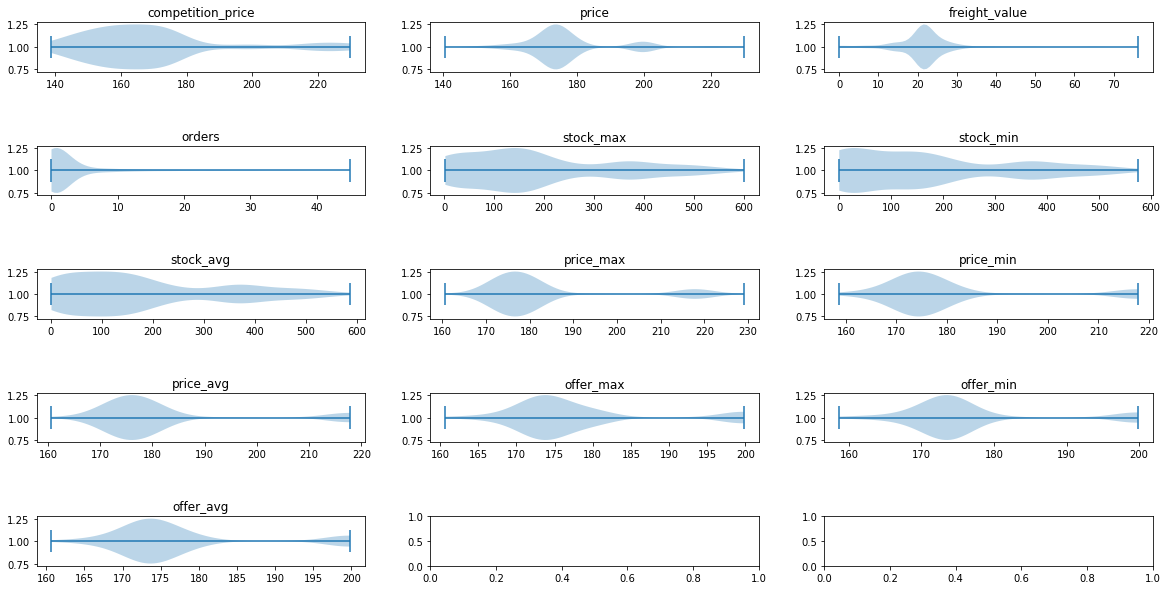

In [10]:
fig, axs = plt.subplots(5,3, figsize=(20, 10))
fig.subplots_adjust(hspace =1.5, wspace=0.2)
axs = axs.ravel()
for i in range(len(df_values.columns)):
    axs[i].violinplot(df_values.iloc[:,i], vert=False)
    axs[i].set_title(df_values.columns[i])

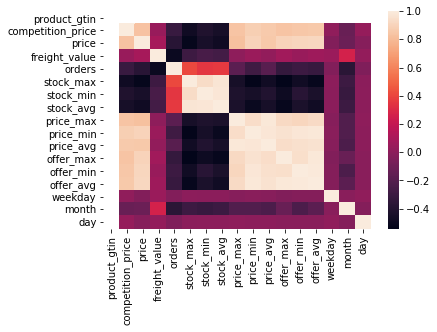

In [11]:
sns.heatmap(df.corr())

Check boxcox and transform variables how has to be transformed. To calculate boxcox, we need to convert values to >0. And we have a lot of 0 in some variables.

In [12]:
#creating a function to check if data is float and if it is, convert it by boxcox criterium
def transf_boxcox(data):
    temp, fitted_lambda = stats.boxcox(data+0.0001)
    if fitted_lambda > 0.8:
        return data
    elif fitted_lambda >= 0:
        return np.sqrt(data)
    else:
        return np.log(data+0.0001)

#list to save the info about which transform was make it, so we can apply to new data, if it was the case.
def boxcox_info(data):
    temp, fitted_lambda = stats.boxcox(data+0.0001)
    if fitted_lambda > 0.8:
        return 'the same'
    elif fitted_lambda >= 0:
        return 'sqrt root'
    else:
        return 'log'


In [13]:
list_transf = []
df_values1 = df_values.copy()
for i in range(len(df_values.columns)):
    df_values1.iloc[:,i] = transf_boxcox(df_values.iloc[:,i])
    list_transf.append(boxcox_info(df_values.iloc[:,i]))

In [14]:
df_values1.head()

,competition_price,price,freight_value,orders,stock_max,stock_min,stock_avg,price_max,price_min,price_avg,offer_max,offer_min,offer_avg
0,5.383578,5.297317,21.5675,0.0,4.690416,4.690416,4.690416,5.383578,5.383578,5.383578,5.297317,5.297317,5.297317
1,5.383578,5.297317,21.5675,0.0,4.690416,4.690416,4.690416,5.383578,5.383578,5.383578,5.297317,5.297317,5.297317
2,5.383578,5.297317,21.5675,0.0,4.690416,4.690416,4.690416,5.383578,5.383578,5.383578,5.297317,5.297317,5.297317
3,5.383578,5.297317,21.5675,0.0,4.690416,4.690416,4.690416,5.383578,5.383578,5.383578,5.297317,5.297317,5.297317
4,5.383578,5.297317,21.5675,0.0,4.690416,4.690416,4.690416,5.383578,5.383578,5.383578,5.297317,5.297317,5.297317


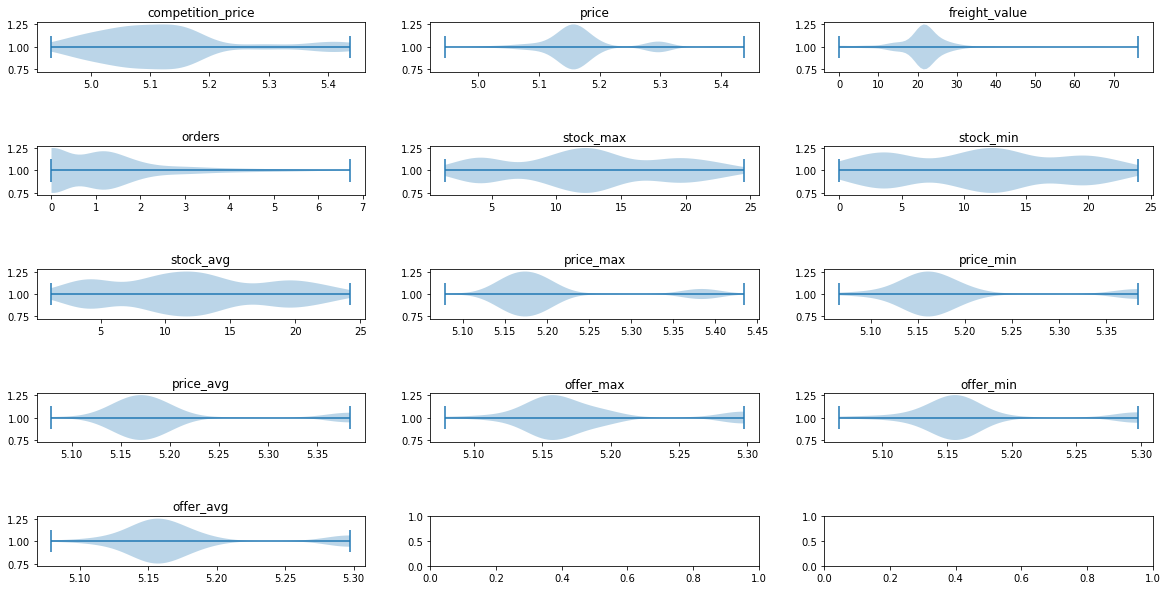

In [15]:
fig, axs = plt.subplots(5,3, figsize=(20, 10))
fig.subplots_adjust(hspace =1.5, wspace=0.2)
axs = axs.ravel()
for i in range(len(df_values1.columns)):
    axs[i].violinplot(df_values1.iloc[:,i], vert=False)
    axs[i].set_title(df_values1.columns[i])

In [16]:
df_values1.describe()

,competition_price,price,freight_value,orders,stock_max,stock_min,stock_avg,price_max,price_min,price_avg,offer_max,offer_min,offer_avg
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,5.125136,5.170993,21.282880,1.162676,12.496870,11.284112,12.087947,5.205212,5.192223,5.201486,5.180503,5.173430,5.176979
std,0.122616,0.069094,7.354367,1.320557,5.939873,6.693169,5.973778,0.077835,0.082921,0.078025,0.053391,0.055854,0.054173
min,4.933035,4.946417,0.000000,0.000000,1.414214,0.000000,1.224745,5.079415,5.066827,5.079415,5.079415,5.066827,5.079415
25%,5.045874,5.143751,20.693750,0.000000,9.380832,4.472136,7.964206,5.164787,5.151557,5.160656,5.151557,5.151557,5.151557
50%,5.109938,5.164501,21.567500,1.000000,12.549885,11.895359,12.015202,5.192402,5.164787,5.175287,5.164787,5.161925,5.164787
75%,5.164787,5.177280,23.050625,1.732051,17.606544,16.611958,17.173647,5.192402,5.192402,5.192402,5.192402,5.164787,5.177280
max,5.437210,5.437210,76.160000,6.708204,24.494897,23.958297,24.209825,5.433722,5.383578,5.383578,5.297317,5.297317,5.297317


Concatenating the nonvalues and values transform dataframe to calculate regressions.

In [17]:
frames = [df_nonvalues, df_values1]
df1 = pd.concat(frames, axis=1, sort=False)
df1.head()

,date,product_gtin,product_type,product_type_group,weekday,month,day,competition_price,price,freight_value,orders,stock_max,stock_min,stock_avg,price_max,price_min,price_avg,offer_max,offer_min,offer_avg
0,2019-03-15,7908243600137,Kit para cabelo,beleza_saude,4,3,15,5.383578,5.297317,21.5675,0.0,4.690416,4.690416,4.690416,5.383578,5.383578,5.383578,5.297317,5.297317,5.297317
1,2019-03-16,7908243600137,Kit para cabelo,beleza_saude,5,3,16,5.383578,5.297317,21.5675,0.0,4.690416,4.690416,4.690416,5.383578,5.383578,5.383578,5.297317,5.297317,5.297317
2,2019-03-17,7908243600137,Kit para cabelo,beleza_saude,6,3,17,5.383578,5.297317,21.5675,0.0,4.690416,4.690416,4.690416,5.383578,5.383578,5.383578,5.297317,5.297317,5.297317
3,2019-03-18,7908243600137,Kit para cabelo,beleza_saude,0,3,18,5.383578,5.297317,21.5675,0.0,4.690416,4.690416,4.690416,5.383578,5.383578,5.383578,5.297317,5.297317,5.297317
4,2019-03-19,7908243600137,Kit para cabelo,beleza_saude,1,3,19,5.383578,5.297317,21.5675,0.0,4.690416,4.690416,4.690416,5.383578,5.383578,5.383578,5.297317,5.297317,5.297317


We made some tests with regressions, taking a look in r2 and AIC coeficients. 

In [18]:
formulas = [
    'orders ~ competition_price',
    'orders ~ price',
    'orders ~ freight_value',
    'orders ~ stock_max',
    'orders ~ stock_min',
    'orders ~ stock_avg',
    'orders ~ price_max',
    'orders ~ price_min',
    'orders ~ price_avg',
    'orders ~ offer_max',
    'orders ~ offer_min',
    'orders ~ offer_avg',
    'orders ~ weekday',
    'orders ~ month',
    'orders ~ day',
    'orders ~ freight_value + stock_max + price',
    'orders ~ freight_value + stock_avg + price + offer_avg',
    'orders ~ freight_value + stock_max + price + stock_avg + stock_min + offer_max + offer_avg',
    'orders ~ freight_value + stock_max + price + stock_avg + stock_min + offer_max + offer_avg + competition_price'
]

As we are still exploring the dataset, we opted to not split the data in train and test, unless we suspect some overfitting.
First, we test the regressions without any kind of transformation.


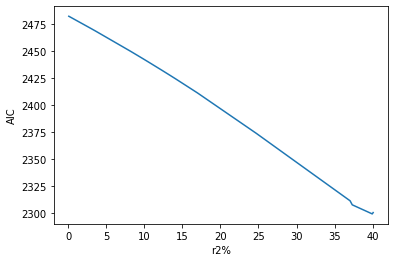

In [19]:
r2 = []
AIC = []

for i in range(len(formulas)):
    formtest = formulas[i]
    model = smf.ols (formula = formtest, data = df).fit()
    r2.append(model.rsquared * 100)
    AIC.append(model.aic)

results = pd.DataFrame(
    {'formulas': formulas,
     'r2%': r2,
     'AIC': AIC
    })

sns.lineplot(x = results['r2%'], y = results['AIC'])

In [20]:
pd.set_option('display.max_colwidth', None)
results[results['r2%'] == results['r2%'].max()]

,formulas,r2%,AIC
18,orders ~ freight_value + stock_max + price + stock_avg + stock_min + offer_max + offer_avg + competition_price,40.051331,2300.324939


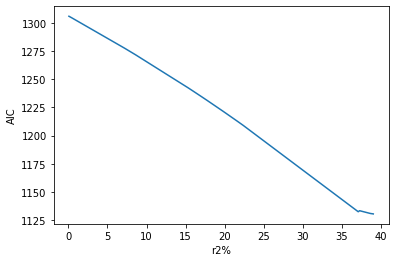

In [21]:
r2 = []
AIC = []

for i in range(len(formulas)):
    formtest = formulas[i]
    model = smf.ols (formula = formtest, data = df1).fit()
    r2.append(model.rsquared * 100)
    AIC.append(model.aic)

results = pd.DataFrame(
    {'formulas': formulas,
     'r2%': r2,
     'AIC': AIC
    })

sns.lineplot(x = results['r2%'], y = results['AIC'])

The best result for the all scenarios analysed here and for one single product, and it's far of test all possibilities.

In [22]:
pd.set_option('display.max_colwidth', None)
results[results['r2%'] == results['r2%'].max()]

,formulas,r2%,AIC
18,orders ~ freight_value + stock_max + price + stock_avg + stock_min + offer_max + offer_avg + competition_price,39.013712,1130.392789


As the results became worse after the transformations. Lets combine some transformed columns with raw columns.

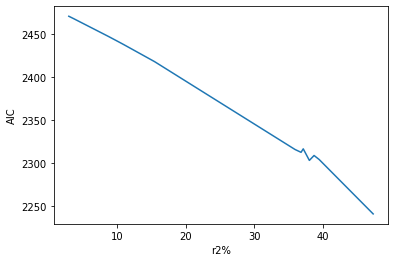

In [23]:
formulas = [
    'orders ~ np.log(competition_price)',
    'orders ~ np.log(price)',
    'orders ~ np.log(freight_value)',
    'orders ~ np.log(stock_max+0.00001)',
    'orders ~ np.log(stock_min+0.00001)',
    'orders ~ np.log(stock_avg+0.00001)',
    'orders ~ np.log(price_max)',
    'orders ~ np.log(price_min)',
    'orders ~ np.log(price_avg)',
    'orders ~ np.log(offer_max)',
    'orders ~ np.log(offer_min)',
    'orders ~ np.log(offer_avg)',
    'orders ~ np.log(freight_value+0.00001) + stock_max + price',
    'orders ~ freight_value + np.log(stock_max+0.00001) + price',   
    'orders ~ freight_value + stock_max + np.log(price)',
    'orders ~ freight_value + stock_avg + price + np.log(offer_avg)',
    'orders ~ freight_value + np.log(stock_max+0.00001) + price + stock_avg + stock_min + offer_max + offer_avg',
    'orders ~ freight_value + stock_max + price + np.log(stock_avg+0.00001) + stock_min + offer_max + offer_avg + competition_price',
    'orders ~ freight_value + stock_max + price + stock_avg + np.log(stock_min+0.00001) + offer_max + offer_avg + competition_price'
]

r2 = []
AIC = []

for i in range(len(formulas)):
    formtest = formulas[i]
    model = smf.ols (formula = formtest, data = df).fit()
    r2.append(model.rsquared * 100)
    AIC.append(model.aic)

results = pd.DataFrame(
    {'formulas': formulas,
     'r2%': r2,
     'AIC': AIC
    })

sns.lineplot(x = results['r2%'], y = results['AIC'])

In [24]:
pd.set_option('display.max_colwidth', None)
results[results['r2%'] == results['r2%'].max()]

,formulas,r2%,AIC
12,orders ~ np.log(freight_value+0.00001) + stock_max + price,47.355485,2240.433114


With so much models developed for one single product, we are far from overfitting (high R2 with increase of AIC, compared with simple models). It's necessary to keep digging. But this process is slow, more if you think that we should do it for 644 products. We need some  feature selection.